In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

In [2]:
analysis = {}
for architecture in os.listdir("./"):
    if os.path.isfile("./" + architecture + "/training.pt"):
        with open("./" + architecture + "/training.pt", "rb") as file:
            analysis[architecture] = pickle.load(file)

for k in analysis.keys(): print(k, end="    ")

1024-512-512_256-128    16-32-64_256    16-32-64_256 enhanced bomb    32-64_256    512-512-512_1024-128-32 LeakyReLU    512-512-512_256-128    512-512-512_256-128 enhanced bomb transf    512-512-512_256-128 enhanced bomb transf flat    512-512-512_256-128 LeakyReLU    512-512-512_256-128 padding same    512-512-512_256-128-d5 LeakyReLU    512-512-512_256-512-256    512-512-512_512-512-256-128    

In [3]:
data_paths = {
    "1024-512-512_256-128": 'Z:/fml-final/data/0-perfect/',
    "16-32-64_256": 'Z:/fml-final/data/0-perfect-all-events-17/',
    "16-32-64_256 enhanced bomb": 'Z:/fml-final/data/0-perfect-all-events-17-bomb/',
    "32-64_256": 'Z:/fml-final/data/0-perfect/',
    "512-512-512_1024-128-32 LeakyReLU": 'Z:/fml-final/data/0-perfect/',
    "512-512-512_256-128": 'Z:/fml-final/data/0-perfect/',
    "512-512-512_256-128 enhanced bomb transf": 'Z:/fml-final/data/0-perfect-enhanced/',
    "512-512-512_256-128 enhanced bomb transf flat": 'Z:/fml-final/data/0-perfect-enhanced/',
    "512-512-512_256-128 LeakyReLU": 'Z:/fml-final/data/0-perfect/',
    "512-512-512_256-128 padding same": 'Z:/fml-final/data/0-perfect/',
    "512-512-512_256-128-d5 LeakyReLU": 'Z:/fml-final/data/0-perfect/',
    "512-512-512_256-512-256": 'Z:/fml-final/data/0-perfect/',
    "512-512-512_512-512-256-128": 'Z:/fml-final/data/0-perfect/'
}

In [4]:
transition_indices = {k: [] for k in np.unique([v for v in data_paths.values()])}
transition_indices

{'Z:/fml-final/data/0-perfect-all-events-17-bomb/': [],
 'Z:/fml-final/data/0-perfect-all-events-17/': [],
 'Z:/fml-final/data/0-perfect-enhanced/': [],
 'Z:/fml-final/data/0-perfect/': []}

In [5]:
if os.path.isfile("transition_indices.pt"):
    with open("transition_indices.pt", "rb") as file:
        transition_indices = pickle.load(file)
else:
    for directory in transition_indices.keys():
        filenames = os.listdir(directory)
        for filename in tqdm(filenames):

            transition_indices[directory].append(0)

            with open(directory + filename, "rb") as file:
                paths = pickle.load(file)
                for path in paths:
                    transition_indices[directory][-1] += len(path)
    with open("transition_indices.pt", "wb") as file:
        pickle.dump(transition_indices, file)

In [6]:
transition_indices_models = {k: [] for k in data_paths.keys()}
for m, d in data_paths.items():
    transition_indices_models[m] = np.copy(transition_indices[d])

15 21
15 21


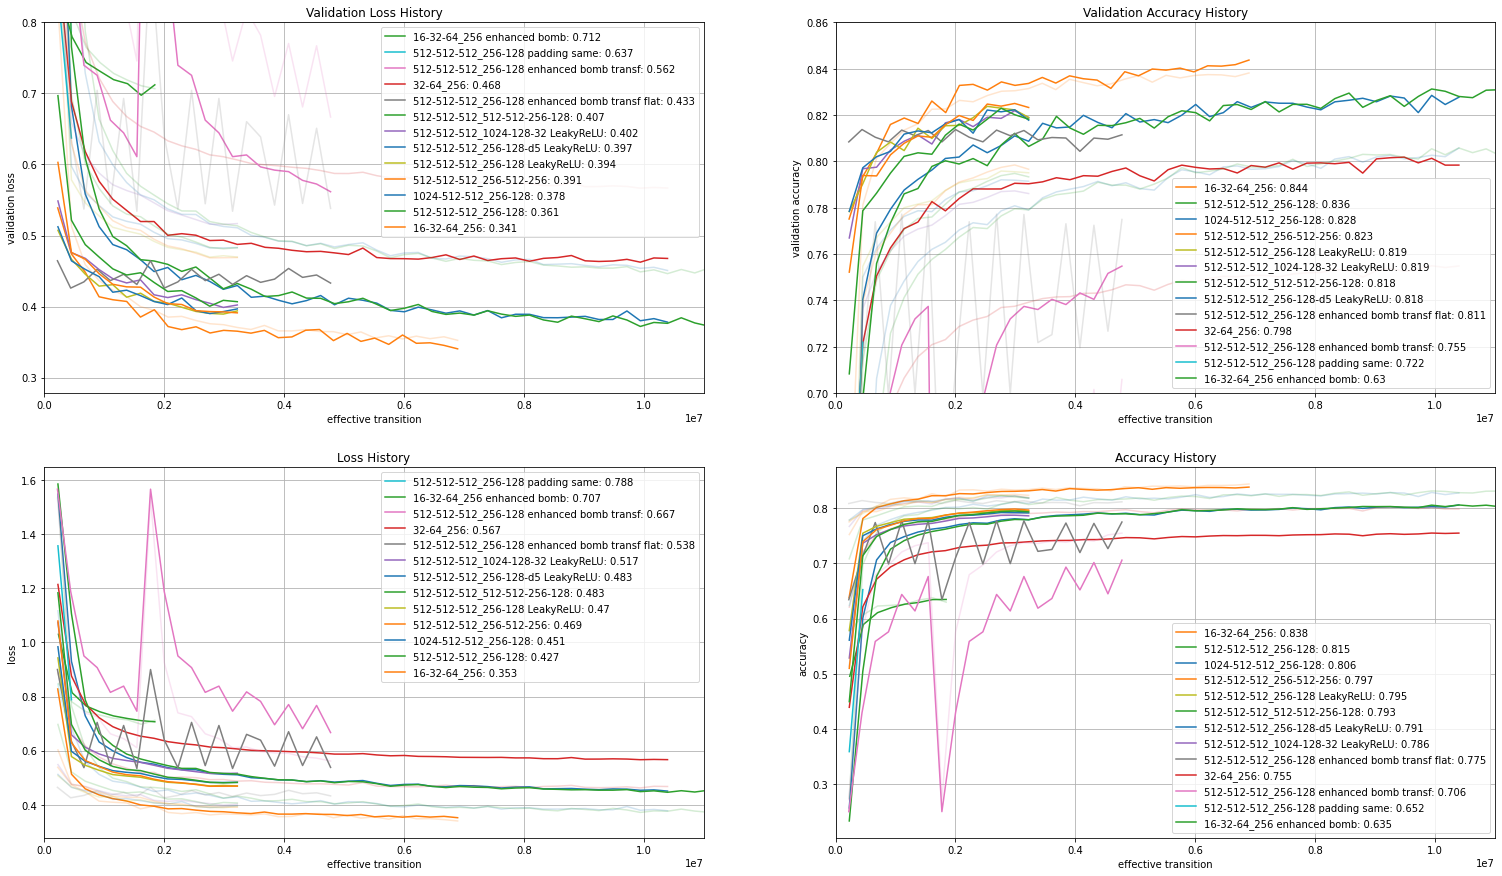

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(26, 15))
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan", "tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]
round_prec = 3

# fig.suptitle(r"Training comparison (training set: 2 epochs x 7 batches x (231,000 $\pm$ 4000) state-action pairs, 10GB)")

ax[0][0].set_title("Validation Loss History")
ax[0][1].set_title("Validation Accuracy History")

ax[1][0].set_title("Loss History")
ax[1][1].set_title("Accuracy History")

for i, (k, v) in enumerate(analysis.items()):
    x = np.copy(transition_indices_models[k]).astype(np.int64)

    if k == "16-32-64_256 enhanced bomb": x = x[:8];
    elif k == "512-512-512_1024-128-32 LeakyReLU": x = x[:14]
    elif k == "512-512-512_256-128":
        x_new = []
        total_transition_sum = np.sum(x)
        for i in [0, 1, 2]:
            for j in range(len(x)):
                x_new.append(x[j])
        x = x_new
            
    elif k == "512-512-512_256-128 enhanced bomb transf":
        print(len(x), len( v["val_loss_history"]))
        x_new = []
        total_transition_sum = np.sum(x)
        for files in range(3):
            for transformations in range(7):
                x_new.append(x[files])

        x = x_new
    elif k == "512-512-512_256-128 enhanced bomb transf flat":
        print(len(x), len( v["val_loss_history"]))
        x_new = []
        total_transition_sum = np.sum(x)
        for files in range(3):
            for transformations in range(7):
                x_new.append(x[files])
        x = x_new

    elif k in ["512-512-512_256-128 LeakyReLU", "512-512-512_256-128-d5 LeakyReLU", "512-512-512_256-512-256", "512-512-512_512-512-256-128"]: x = x[:14]
    elif k == "512-512-512_256-128 padding same": x = x[:2]

    x = np.cumsum(x)

    cutoff = 50 if k == "512-512-512_256-128" else None

    ax[0][0].plot(x[:cutoff], v["val_loss_history"][:cutoff], label=k + ": " + str(np.round(v["val_loss_history"][-1], round_prec)), color=colors[i])
    ax[0][1].plot(x[:cutoff], v["val_accuracy_history"][:cutoff], label=k + ": " + str(np.round(v["val_accuracy_history"][-1], round_prec)), color=colors[i])
    ax[1][0].plot(x[:cutoff], v["loss_history"][:cutoff], label=k + ": " + str(np.round(v["loss_history"][-1], round_prec)), color=colors[i])
    ax[1][1].plot(x[:cutoff], v["accuracy_history"][:cutoff], label=k + ": " + str(np.round(v["accuracy_history"][-1], round_prec)), color=colors[i])

    ax[1][0].plot(x[:cutoff], v["val_loss_history"][:cutoff], alpha=0.2, color=colors[i])
    ax[1][1].plot(x[:cutoff], v["val_accuracy_history"][:cutoff], alpha=0.2, color=colors[i])
    ax[0][0].plot(x[:cutoff], v["loss_history"][:cutoff], alpha=0.2, color=colors[i])
    ax[0][1].plot(x[:cutoff], v["accuracy_history"][:cutoff], alpha=0.2, color=colors[i])


ax[0][0].set_ylabel("validation loss")
ax[0][1].set_ylabel("validation accuracy")

ax[1][0].set_ylabel("loss")
ax[1][1].set_ylabel("accuracy")

ax[0][0].set_ylim(None, 0.8)
ax[0][1].set_ylim(0.7, 0.86)

for axis_index, metric in zip([(0, 0), (0, 1), (1, 0), (1, 1)], ["val_loss_history", "val_accuracy_history", "loss_history", "accuracy_history"]):
    ax[axis_index].set_xlabel("effective transition")
    ax[axis_index].grid("all")
    ax[axis_index].set_xlim(0, 1.1e7)

    h, l = ax[axis_index].get_legend_handles_labels()
    if len(l) != 0:
        l, h, end_value = zip(*sorted([[l[ki], h[ki], analysis[architecture][metric][-1]] for ki, architecture in enumerate(analysis.keys())], key=lambda a: -a[2]))
        ax[axis_index].legend(h, l, loc="upper right" if axis_index[1] == 0 else "lower right");